# Similarity of images based on EfficentNet
Paper: https://arxiv.org/pdf/1905.11946.pdf

Family of models: https://www.kaggle.com/models/tensorflow/efficientnet/frameworks/tensorFlow1/variations/lite0-feature-vector/versions/2?tfhub-redirect=true

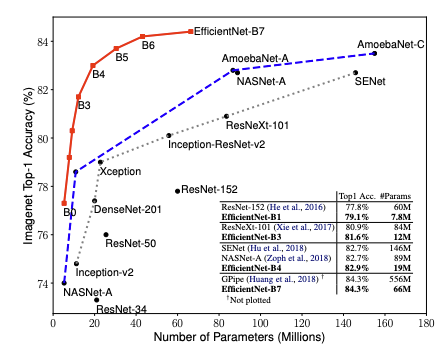

In [2]:
import tensorflow as tf
import tensorflow_hub as hub
from PIL import Image
import numpy as np

In [3]:
model_url = "https://tfhub.dev/tensorflow/efficientnet/lite0/feature-vector/2"

IMAGE_SHAPE = (224, 224)

layer = hub.KerasLayer(model_url)
model = tf.keras.Sequential([layer])

In [4]:
def extract(file):
  file = Image.open(file).convert('L').resize(IMAGE_SHAPE)
  #display(file)

  file = np.stack((file,)*3, axis=-1)

  file = np.array(file)/255.0

  embedding = model.predict(file[np.newaxis, ...])
  print(embedding)
  vgg16_feature_np = np.array(embedding)
  flattended_feature = vgg16_feature_np.flatten()

  print(len(flattended_feature))
  print(flattended_feature)
  print('-----------')
  return flattended_feature


In [5]:
man1 = extract('similarity/1_1.jpeg')
man2 = extract('similarity/1_2.jpeg')
weird_100 = extract('similarity/2_100.jpeg')
weird_80 = extract('similarity/2_80.jpeg')
weird_50 = extract('similarity/2_50.jpeg')
weird_10 = extract('similarity/2_10.jpeg')

1/1 [==============================] - 0s 369ms/step
[[0.00902604 0.0044261  0.1247991  ... 0.         2.0121107  0.06470873]]
1280
[0.00902604 0.0044261  0.1247991  ... 0.         2.0121107  0.06470873]
-----------
1/1 [==============================] - 0s 19ms/step
[[0.         0.04408818 0.20202582 ... 0.         2.2867775  0.08862242]]
1280
[0.         0.04408818 0.20202582 ... 0.         2.2867775  0.08862242]
-----------
1/1 [==============================] - 0s 19ms/step
[[0.148816   0.         0.00098109 ... 0.35058585 0.08765942 0.        ]]
1280
[0.148816   0.         0.00098109 ... 0.35058585 0.08765942 0.        ]
-----------
1/1 [==============================] - 0s 18ms/step
[[0.07394741 0.         0.         ... 0.2857331  0.09524108 0.01391826]]
1280
[0.07394741 0.         0.         ... 0.2857331  0.09524108 0.01391826]
-----------
1/1 [==============================] - 0s 18ms/step
[[0.2969577  0.         0.         ... 0.20756187 0.20315687 0.        ]]
1280
[0.29695

In [6]:
from scipy.spatial import distance

In [7]:
metric = 'cosine'

In [8]:
dc = distance.cdist([man1], [man2], metric)[0]
print(dc)

[0.02002549]


In [9]:
for i in [weird_10, weird_50, weird_80, weird_100]:
    print(distance.cdist([i], [man1], metric)[0])

[0.62424173]
[0.59822613]
[0.58532146]
[0.60908129]
